In [123]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cwd = os.getcwd()
print(cwd)

C:\Users\kmp57\Desktop\Documents\GitHub\grid-uk-ml\notebooks


In [124]:
path = r"..\data"
filename = "\df_clean.csv"
df = pd.read_csv(path + filename)
#df.reset_index()
df['Datetime'] = pd.to_datetime(df['Datetime'], format="%Y/%m/%d %H:%M:%S")
df = df.set_index("Datetime")
df.head()

,national_demand,pump_demand,demand_forecast,demand_outturn,demand_forecast_publishdate,f01,f02,f03,f04,f05,...,wind_perc,total_wind_power,wind_forecast_publishdate,wind_forecast,temperature_deg,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity,import_export_electricity
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:30:00,20724,1476,20370,20530,2021-10-31T08:45:00,0.008494,0.000077,0.000027,1.611739e-05,1.287691e-05,...,53.8,10267.074,2021-10-31T07:19:46,9176.0,7.1,73,23.7,222.0,1704,1704
2021-11-01 01:00:00,20512,1462,20150,20743,2021-10-31T08:45:00,0.013711,0.000029,0.000008,5.010766e-06,4.228506e-06,...,54.3,10317.332,2021-10-31T07:19:46,9285.0,7.5,80,24.7,214.0,1361,1361
2021-11-01 01:30:00,19950,1470,19949,20503,2021-10-31T08:45:00,0.010672,0.000016,0.000002,9.573108e-07,7.481108e-07,...,54.0,10091.954,2021-10-31T07:19:46,9402.0,7.5,80,24.7,214.0,1306,1306
2021-11-01 02:00:00,19277,1414,19553,19924,2021-10-31T08:45:00,0.020586,0.000015,0.000002,9.279950e-07,7.399787e-07,...,55.0,10187.366,2021-10-31T07:19:46,9525.0,7.7,100,25.6,215.0,340,340
2021-11-01 02:30:00,18909,1296,19123,19261,2021-10-31T08:45:00,0.005257,0.000020,0.000006,2.867731e-06,2.522290e-06,...,55.4,10128.426,2021-10-31T07:19:46,9652.0,7.7,100,25.6,215.0,182,182


### Error Histogram

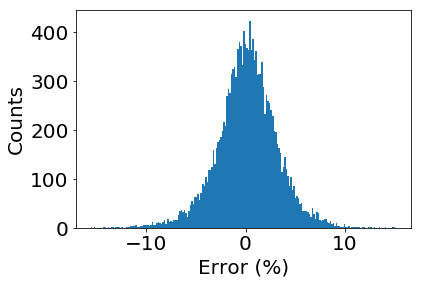

In [125]:
df["demand_forecast_error"] = (df["demand_forecast"] - df["demand_outturn"])/df["national_demand"]*100
df["wind_forecast_error"] = (df["wind_forecast"] - df["total_wind_power"])/df["total_wind_power"]*100

plt.hist(df["demand_forecast_error"], 200)

plt.xlabel("Error (%)")
plt.ylabel("Counts")
plt.savefig('error_hist.png')

#plt.plot(df["demand_forecast_error"])

#plt.plot(df["demand_forecast_error"] - abs(df["demand_forecast_error_calc"]))

### Find 10 largest error events ( positive and negative separate)

C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  from ipykernel import kernelapp as app
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  from ipykernel import kernelapp as app
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays

C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  from ipykernel import kernelapp as app
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  from ipykernel import kernelapp as app
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: in the future insert will treat boolean arrays

C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  from ipykernel import kernelapp as app
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  from ipykernel import kernelapp as app
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
C:\Users\kmp57\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: in the future insert will treat boolean arrays

,national_demand,pump_demand,demand_forecast,demand_outturn,demand_forecast_publishdate,f01,f02,f03,f04,f05,...,wind_forecast_publishdate,wind_forecast,temperature_deg,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity,import_export_electricity,demand_forecast_error,wind_forecast_error
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-12-26 08:30:00,25070,154,19720,23621,2021-12-25T08:45:00,0.016938,0.000008,1.995624e-06,1.349583e-06,1.246015e-06,...,2021-12-25T07:19:52,10857.0,2.4,100,32.1,103.0,-766,-766,-15.560431,5.485191
2021-12-26 07:30:00,22587,463,18766,21956,2021-12-25T08:45:00,0.035439,0.000103,3.958726e-05,2.452436e-05,1.965258e-05,...,2021-12-25T07:19:52,11208.0,2.4,100,32.6,103.0,-1337,-1337,-14.123168,8.456826
2022-05-15 16:00:00,25337,7,21107,24509,2022-05-14T08:45:00,0.030701,0.000061,2.153341e-05,1.227377e-05,9.983180e-06,...,2022-05-14T07:21:30,6244.0,17.4,46,28.7,352.0,-2431,-2431,-13.427004,-32.430297
2021-12-26 09:30:00,28132,5,22917,26578,2021-12-25T08:45:00,0.038457,0.000027,1.053118e-05,6.995240e-06,6.488919e-06,...,2021-12-25T07:19:52,10373.0,2.5,100,31.5,104.0,5,5,-13.013650,2.692843
2021-12-26 10:30:00,30031,8,25650,29450,2021-12-25T08:45:00,0.012320,0.000009,3.474823e-06,2.199039e-06,2.311886e-06,...,2021-12-25T07:19:52,9762.0,2.9,100,27.9,101.0,1414,1414,-12.653591,-3.293241
2022-05-15 15:30:00,24471,6,20860,23777,2022-05-14T08:45:00,0.022129,0.000052,1.734547e-05,1.015410e-05,8.496562e-06,...,2022-05-14T07:21:30,6141.0,17.9,50,29.0,353.0,-1925,-1925,-11.920232,-32.529192
2022-04-27 14:30:00,29726,7,26597,30041,2022-04-26T08:45:00,0.013530,0.000008,2.123560e-06,1.350459e-06,9.838108e-07,...,2022-04-26T07:21:25,1595.0,10.9,85,11.6,7.0,687,687,-11.585817,-12.212144
2021-12-25 17:00:00,29478,5,26700,30068,2021-12-24T08:45:00,0.023299,0.000009,3.277401e-06,2.224220e-06,2.053956e-06,...,2021-12-24T07:19:33,12470.0,2.8,70,36.7,106.0,829,829,-11.425470,7.343852
2021-12-26 12:00:00,31979,8,27739,31346,2021-12-25T08:45:00,0.009218,0.000017,5.381236e-06,3.626186e-06,2.827166e-06,...,2021-12-25T07:19:52,8634.0,3.7,100,26.2,103.0,3181,3181,-11.279277,-7.364630


### Correlation Matrix Across Year

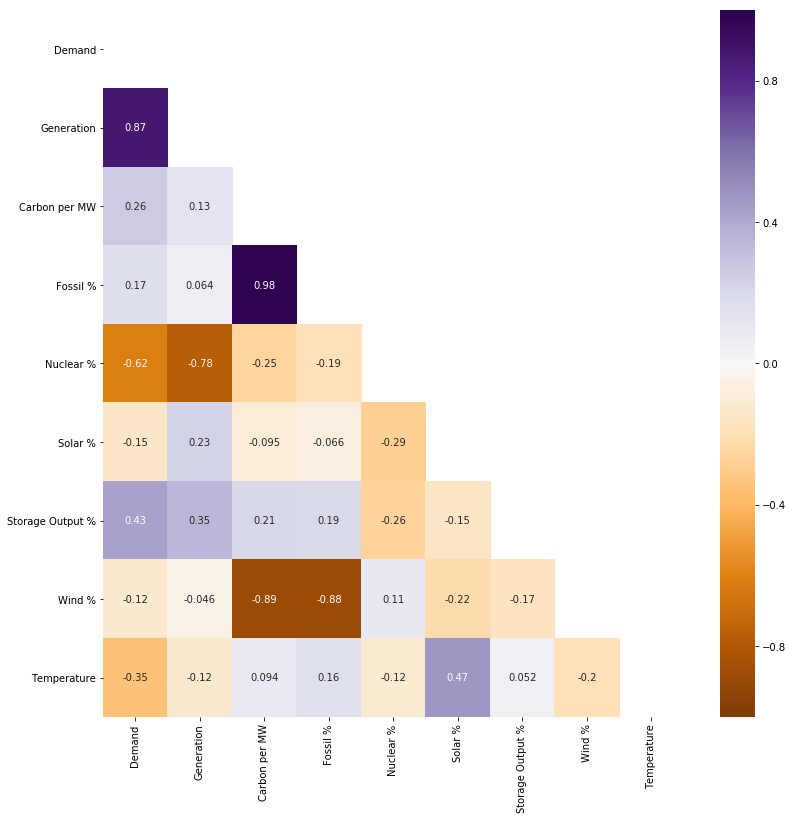

In [34]:
plt.figure(figsize=(13, 13))
corr_columns = ["national_demand","generation","carbon_intensity","fossil_perc",
                "nuclear_perc","solar_perc","storage_perc","wind_perc",
                "temperature_deg"]

labels = ["Demand","Generation","Carbon per MW","Fossil %",
                "Nuclear %","Solar %","Storage Output %","Wind %",
                "Temperature"]

corr_all = df[corr_columns].corr()

mask = np.triu(np.ones_like(corr_all, dtype=bool))

heatmap = sns.heatmap(corr_all,mask = mask, vmin=-1, vmax=1, annot=True, cmap='PuOr',
                      xticklabels = labels,yticklabels = labels)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

### Generation by Type

33247.84732014725


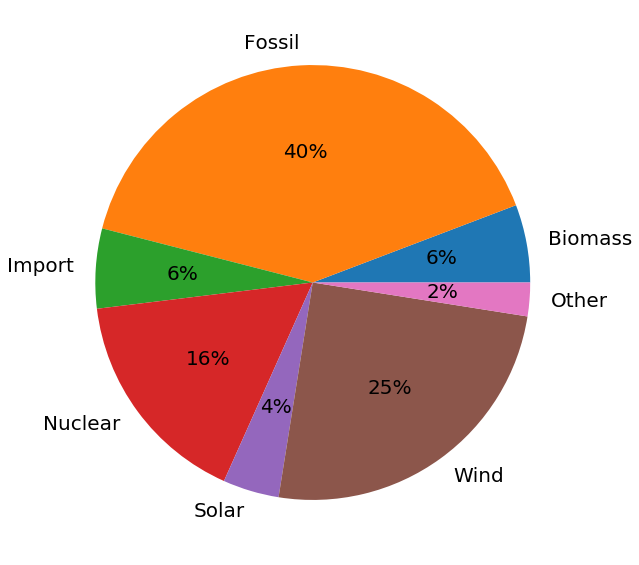

In [117]:
gen_columns = ["biomass_perc",
    "fossil_perc",
    "imports_perc",
    "nuclear_perc",
    "solar_perc",
    "wind_perc"]
gen_labels = ["Biomass",
    "Fossil",
    "Import",
    "Nuclear",
    "Solar",
    "Wind"]

gen_perc = []
for ii in gen_columns:
    gen_perc.append(df[ii].sum())

# Combine small contributors into ther
other_columns = ["hydro_perc",
    "other_perc",
    "storage_perc"]
other_labels = ["Hydro",
    "Solar",
    "Stored"]

other_perc = []
for ii in other_columns:
    other_perc.append(df[ii].sum())
other_perc = sum(other_perc)    

gen_perc.append(other_perc)
gen_labels.append("Other")

explode = (0,0,0,0,0,0,0)


    
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 20
plt.pie(gen_perc,labels = gen_labels, explode = explode,autopct='%1.0f%%')
plt.savefig('gen_type.png', dpi=300, bbox_inches='tight')
print(df["generation"].mean())

### Generation by Type at night

26605.943113772457


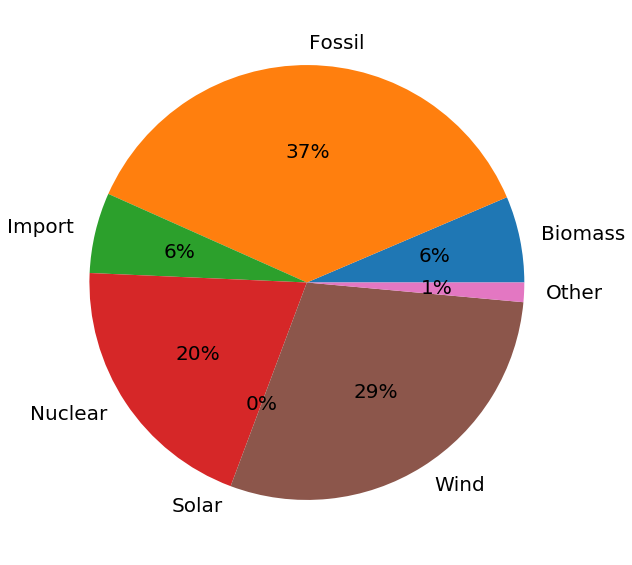

In [120]:
start_time = '02:30'
end_time = '03:00'
# print(df.between_time('20:00','06:00'))


gen_perc = []
for ii in gen_columns:
    gen_perc.append(df[ii].between_time(start_time,end_time).sum())

other_perc = []
for ii in other_columns:
    other_perc.append(df[ii].between_time(start_time,end_time).sum())
other_perc = sum(other_perc)    

gen_perc.append(other_perc)

explode = (0,0,0,0,0,0,0)

plt.figure(figsize=(10, 10))  
plt.rcParams['font.size'] = 20
plt.pie(gen_perc,labels = gen_labels, explode = explode,autopct='%1.0f%%')
plt.savefig('gen_type_night.png', dpi=300, bbox_inches='tight')
print(df["generation"].between_time(start_time,end_time).mean())

### Generation by Type during undergeneration

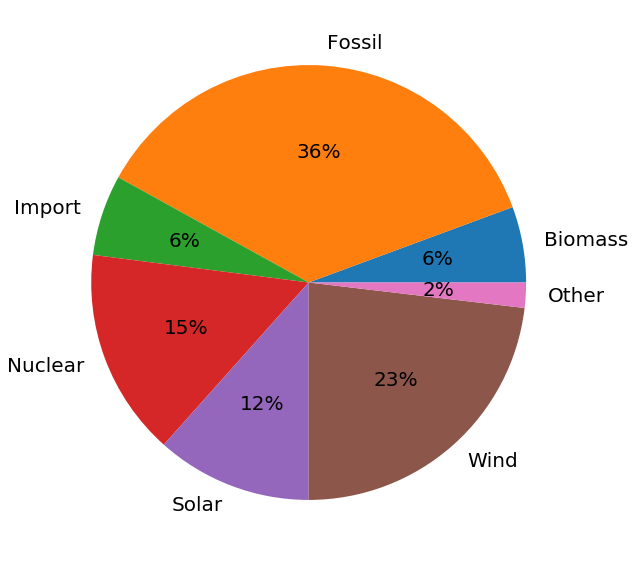

In [170]:



gen_perc = []
for ii in gen_columns:
    gen_perc.append(df[ii].loc[idx_pos_select].sum())

other_perc = []
for ii in other_columns:
    other_perc.append(df[ii].loc[idx_pos_select].sum())
other_perc = sum(other_perc)    

gen_perc.append(other_perc)

explode = (0,0,0,0,0,0,0)

plt.figure(figsize=(10, 10))  
plt.rcParams['font.size'] = 20
plt.pie(gen_perc,labels = gen_labels, explode = explode,autopct='%1.0f%%')
plt.savefig('gen_type_neg.png', dpi=300, bbox_inches='tight')


In [152]:
print(abs(idx - idx_pos).astype('timedelta64[m]').sort_values())dd

Int64Index([   570,    660,    690,   2610,   2640,   2670,   2700,   2730,
              3360,   3390,
            ...
            464940, 464970, 465600, 465630, 471630, 471660, 471690, 471780,
            471810, 471900],
           dtype='int64', name='Datetime', length=800)
